# Market Data Collection & Exploratory Data Analysis
## Step 1: Setup and Data Collection

This notebook will guide you through:
1. Installing required packages
2. Collecting market data
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Data Preparation for Modeling

In [1]:
# Install required packages
# Run this cell first
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn joblib ta-lib plotly

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 100.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 79.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 84.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 82.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 82.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 98.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 83.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 114.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 93.2 MB/s  0:00:006m0:00:01
  Created wheel for multitasking: 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27/27 [seaborn]6/27 [seaborn]ib]n]

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('Libraries imported successfully!')

Libraries imported successfully!


## Step 2: Data Collection

We'll fetch historical stock market data using yfinance. You can modify the ticker symbol and date range as needed.

In [3]:
# Define parameters
TICKER = 'AAPL'  # Change this to any stock ticker (e.g., 'TSLA', 'GOOGL', 'MSFT')
START_DATE = '2020-01-01'
END_DATE = datetime.now().strftime('%Y-%m-%d')

print(f'Fetching data for {TICKER} from {START_DATE} to {END_DATE}...')

# Download data
df = yf.download(TICKER, start=START_DATE, end=END_DATE)

print(f'\nData fetched successfully!')
print(f'Shape: {df.shape}')
print(f'\nFirst few rows:')
df.head()

Fetching data for AAPL from 2020-01-01 to 2026-02-03...


[*********************100%***********************]  1 of 1 completed


Data fetched successfully!
Shape: (1529, 5)

First few rows:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468285,72.528604,71.223282,71.476622,135480400
2020-01-03,71.763733,72.523762,71.539345,71.696175,146322800
2020-01-06,72.335571,72.374177,70.634554,70.885487,118387200
2020-01-07,71.995354,72.600960,71.775789,72.345204,108872000
2020-01-08,73.153488,73.455087,71.698574,71.698574,132079200


In [8]:
# Save raw data
df.to_csv('/workspaces/Automation-project-Market-price-prediction/data/raw_market_data.csv')
print('Raw data saved to ../data/raw_market_data.csv')

Raw data saved to ../data/raw_market_data.csv


## Step 3: Initial Data Exploration

In [9]:
# Basic information
print('Dataset Information:')
print('='*50)
df.info()

print('\n' + '='*50)
print('Statistical Summary:')
print('='*50)
df.describe()

Dataset Information:
<class 'pandas.DataFrame'>
DatetimeIndex: 1529 entries, 2020-01-02 to 2026-02-02
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1529 non-null   float64
 1   (High, AAPL)    1529 non-null   float64
 2   (Low, AAPL)     1529 non-null   float64
 3   (Open, AAPL)    1529 non-null   float64
 4   (Volume, AAPL)  1529 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 71.7 KB

Statistical Summary:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1529.000000,1529.000000,1529.000000,1529.000000,1.529000e+03
mean,166.223015,167.922260,164.358137,166.065081,8.410474e+07
std,50.562202,50.872139,50.206047,50.525974,5.117186e+07
min,54.264324,55.263174,51.420146,55.161597,1.791060e+07
25%,131.973145,133.523236,130.286564,132.126671,5.041930e+07
50%,164.424408,166.307322,162.983412,164.560272,6.988650e+07
75%,200.577713,202.816468,198.841351,200.926977,9.962530e+07
max,286.190002,288.619995,283.299988,286.200012,4.265100e+08


In [ ]:
# Check for missing values
print('Missing Values:')
print('='*50)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print('\nNo missing values found! ✓')

Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

No missing values found! ✓


## Step 4: Exploratory Data Analysis (EDA)

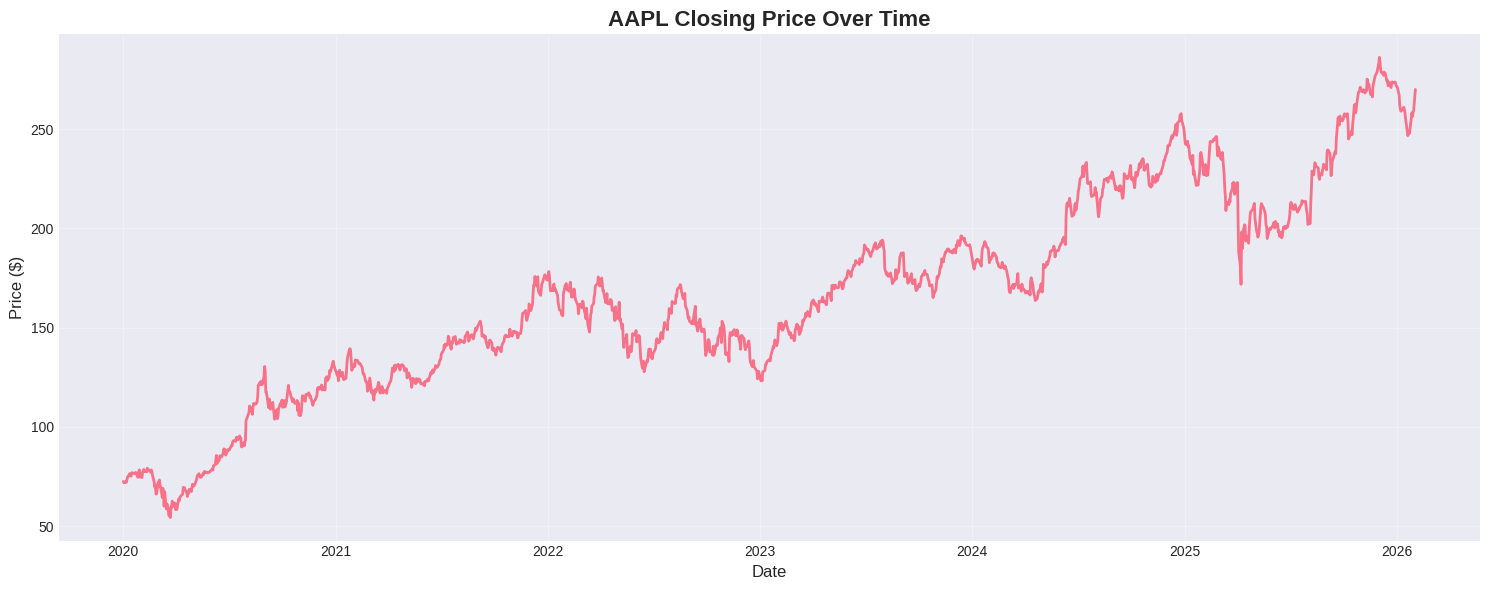

In [ ]:
# Plot 1: Closing Price Over Time
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Close'], linewidth=2)
plt.title(f'{TICKER} Closing Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

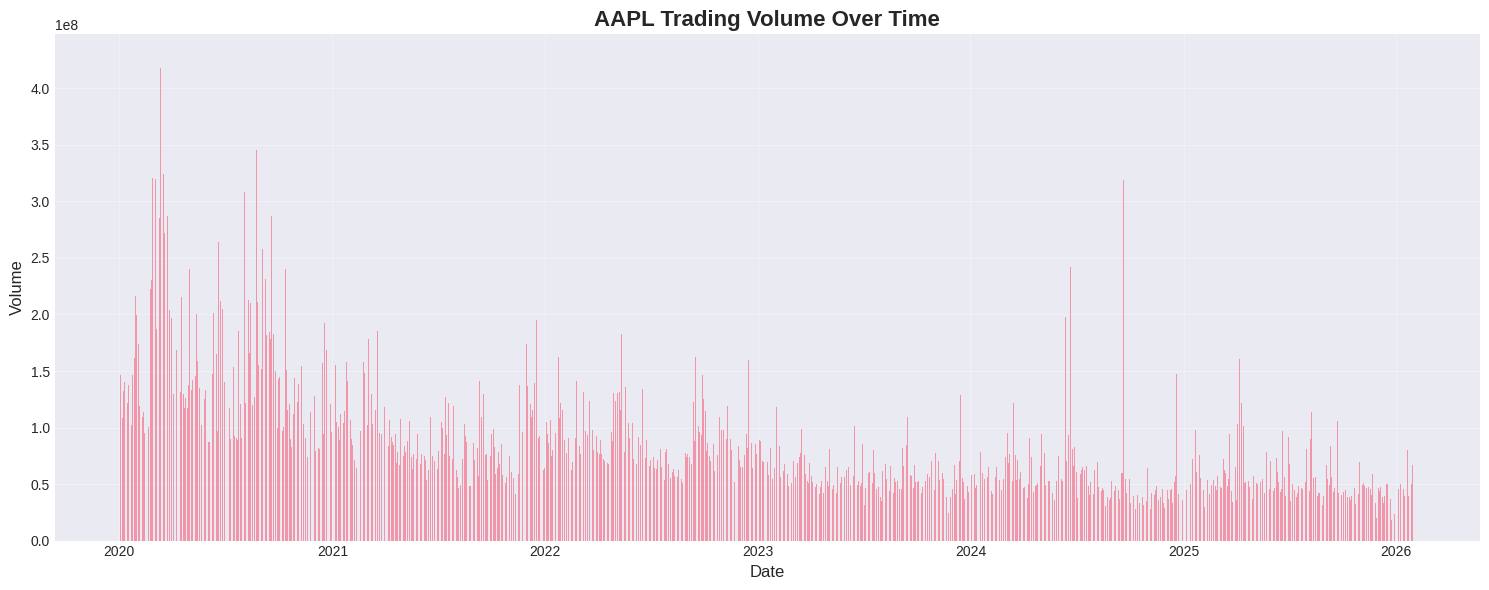

In [ ]:
# Plot 2: Volume Analysis
plt.figure(figsize=(15, 6))
plt.bar(df.index, df[('Volume', TICKER)].values, alpha=0.7)
plt.title(f'{TICKER} Trading Volume Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

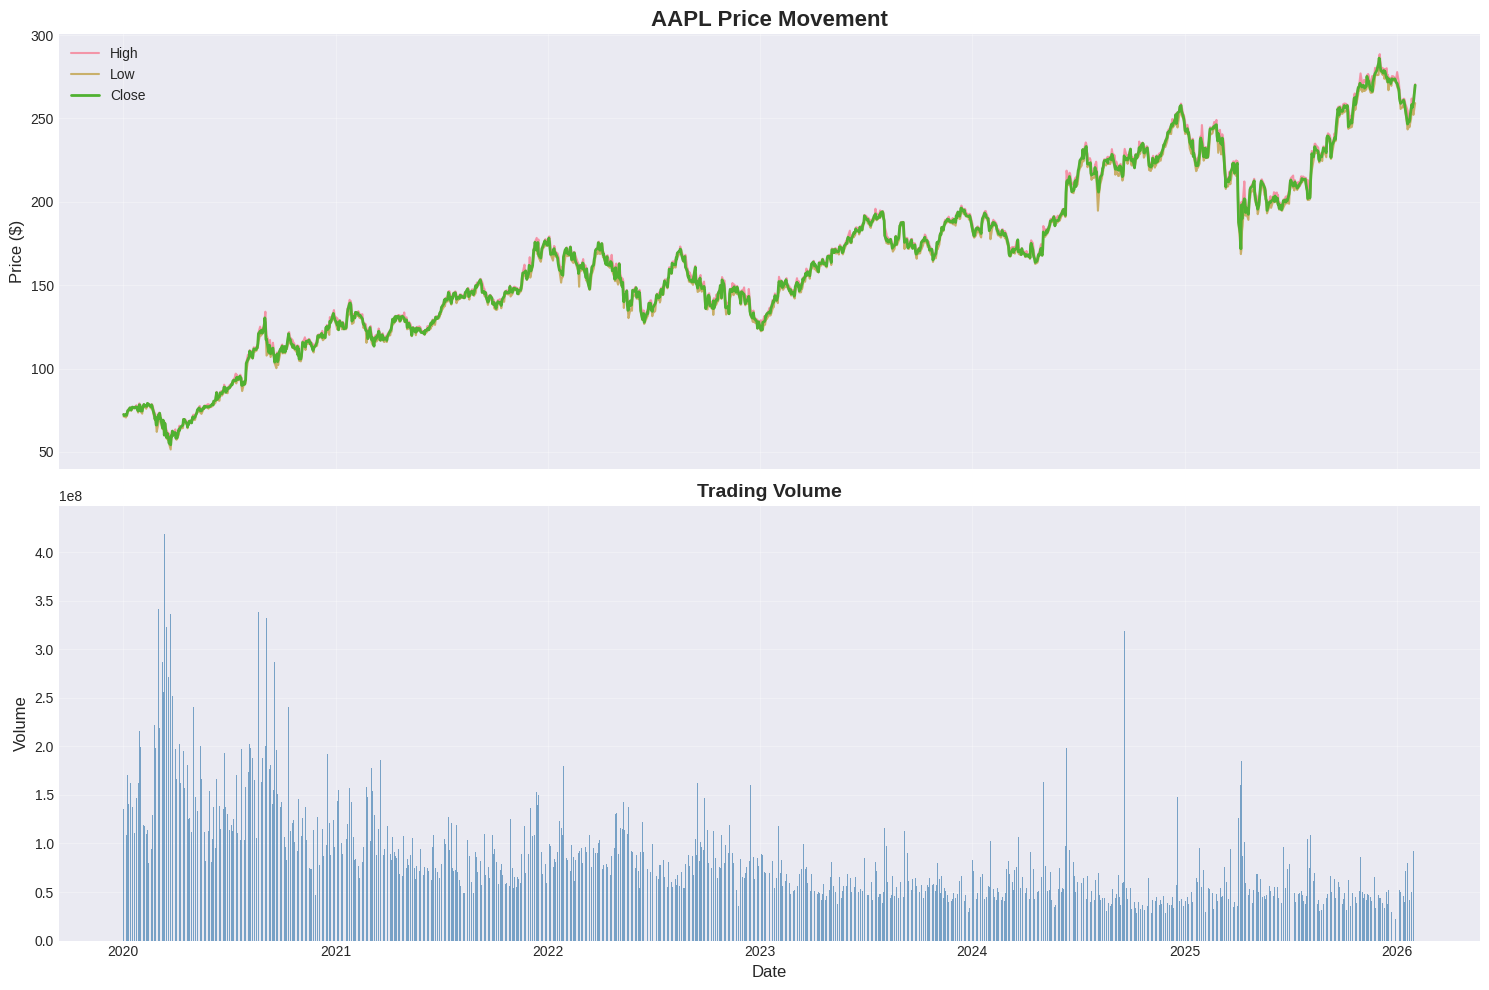

In [ ]:
# Plot 3: OHLC Candlestick-style visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Price subplot
ax1.plot(df.index, df[('High', TICKER)], label='High', alpha=0.7)
ax1.plot(df.index, df[('Low', TICKER)], label='Low', alpha=0.7)
ax1.plot(df.index, df[('Close', TICKER)], label='Close', linewidth=2)
ax1.fill_between(df.index, df[('Low', TICKER)].values, df[('High', TICKER)].values, alpha=0.2)
ax1.set_title(f'{TICKER} Price Movement', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Volume subplot
ax2.bar(df.index, df[('Volume', TICKER)].values, alpha=0.7, color='steelblue')
ax2.set_title('Trading Volume', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Volume', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

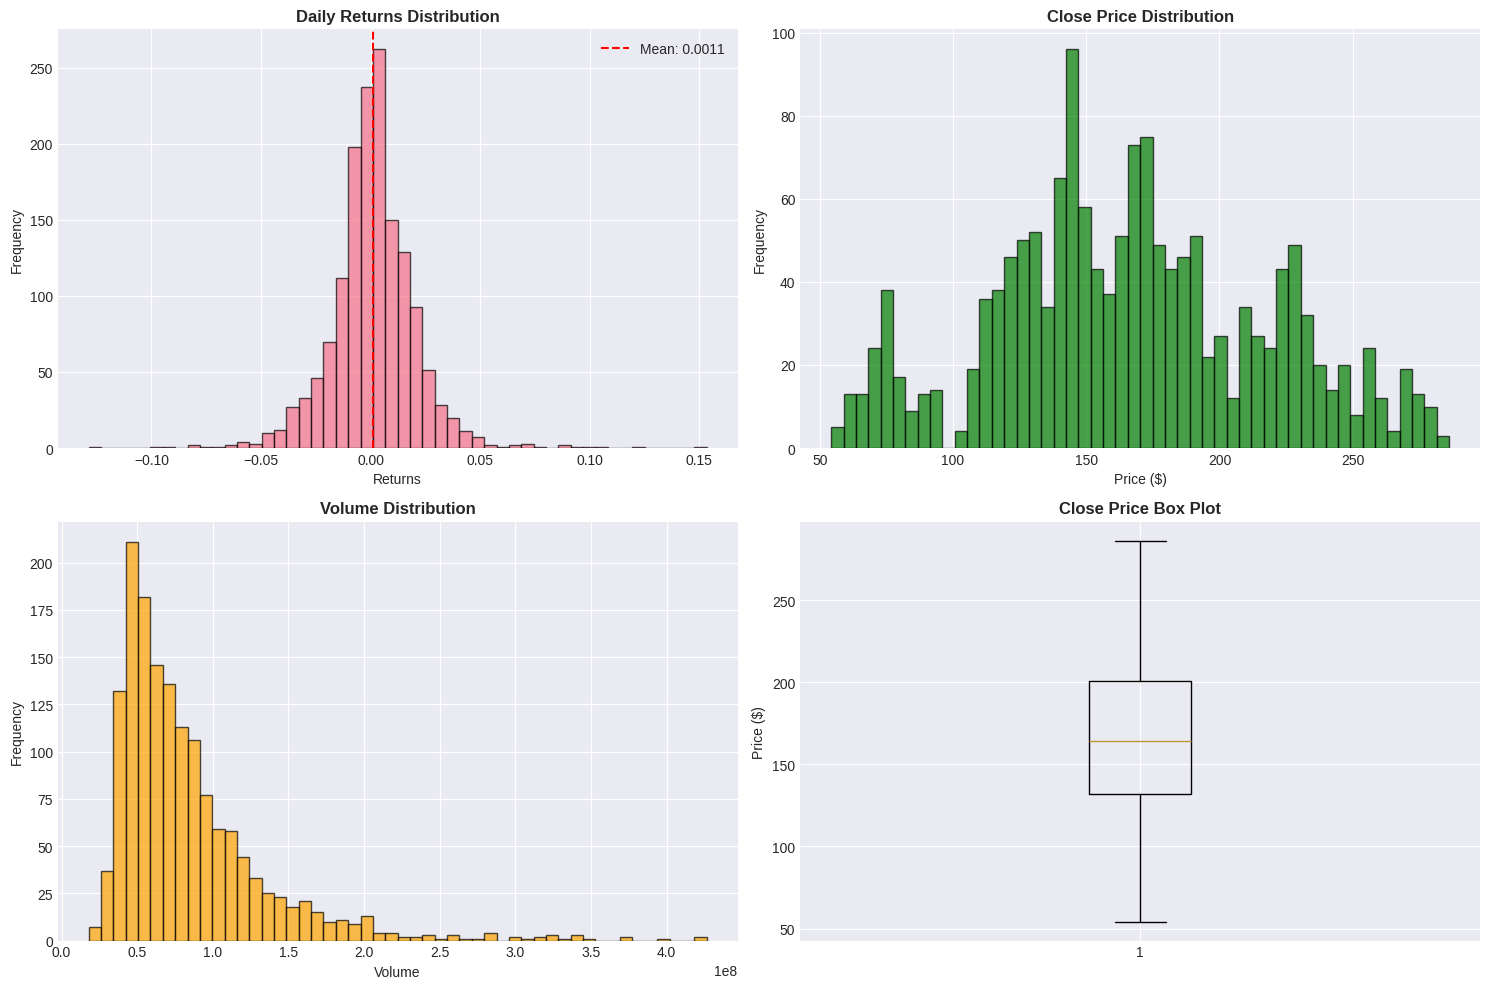

In [ ]:
# Plot 4: Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Daily Returns Distribution
daily_returns = df[('Close', TICKER)].pct_change().dropna()
axes[0, 0].hist(daily_returns, bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Daily Returns Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Returns')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(daily_returns.mean(), color='red', linestyle='--', label=f'Mean: {daily_returns.mean():.4f}')
axes[0, 0].legend()

# Close Price Distribution
axes[0, 1].hist(df[('Close', TICKER)], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('Close Price Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Price ($)')
axes[0, 1].set_ylabel('Frequency')

# Volume Distribution
axes[1, 0].hist(df[('Volume', TICKER)], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_title('Volume Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Volume')
axes[1, 0].set_ylabel('Frequency')

# Box plot for Close prices
axes[1, 1].boxplot(df[('Close', TICKER)], vert=True)
axes[1, 1].set_title('Close Price Box Plot', fontweight='bold')
axes[1, 1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

In [ ]:
# Statistical Analysis
print('Price Analysis:')
print('='*50)
print(f'Current Price: ${df[('Close', TICKER)].iloc[-1].item():.2f}')
print(f'52-Week High: ${df[('High', TICKER)].tail(252).max():.2f}')
print(f'52-Week Low: ${df[('Low', TICKER)].tail(252).min():.2f}')
print(f'Average Volume (30 days): {df[('Volume', TICKER)].tail(30).mean():,.0f}')
print(f'\nDaily Returns Statistics:')
print(f'Mean: {daily_returns.mean():.4f}')
print(f'Std Dev: {daily_returns.std():.4f}')
print(f'Skewness: {daily_returns.skew():.4f}')
print(f'Kurtosis: {daily_returns.kurtosis():.4f}')

Price Analysis:
Current Price: $270.01
52-Week High: $288.62
52-Week Low: $168.63
Average Volume (30 days): 49,629,750

Daily Returns Statistics:
Mean: 0.0011
Std Dev: 0.0200
Skewness: 0.2881
Kurtosis: 6.7947


## Step 5: Feature Engineering

Creating technical indicators and features for machine learning

In [ ]:
# Create a copy for feature engineering
df_features = df.copy()

# 1. Moving Averages
df_features['MA_5'] = df_features[('Close', TICKER)].rolling(window=5).mean()
df_features['MA_10'] = df_features[('Close', TICKER)].rolling(window=10).mean()
df_features['MA_20'] = df_features[('Close', TICKER)].rolling(window=20).mean()
df_features['MA_50'] = df_features[('Close', TICKER)].rolling(window=50).mean()

# 2. Exponential Moving Averages
df_features['EMA_12'] = df_features[('Close', TICKER)].ewm(span=12, adjust=False).mean()
df_features['EMA_26'] = df_features[('Close', TICKER)].ewm(span=26, adjust=False).mean()

# 3. MACD (Moving Average Convergence Divergence)
df_features['MACD'] = df_features['EMA_12'] - df_features['EMA_26']
df_features['MACD_Signal'] = df_features['MACD'].ewm(span=9, adjust=False).mean()

# 4. RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_features['RSI'] = calculate_rsi(df_features[('Close', TICKER)])

# 5. Bollinger Bands
df_features['BB_Middle'] = df_features[('Close', TICKER)].rolling(window=20).mean()
bb_std = df_features[('Close', TICKER)].rolling(window=20).std()
df_features['BB_Upper'] = df_features['BB_Middle'] + (bb_std * 2)
df_features['BB_Lower'] = df_features['BB_Middle'] - (bb_std * 2)

# 6. Price-based features
df_features['Daily_Return'] = df_features[('Close', TICKER)].pct_change()
df_features['Price_Range'] = df_features[('High', TICKER)] - df_features[('Low', TICKER)]
df_features['Price_Change'] = df_features[('Close', TICKER)] - df_features[('Open', TICKER)]

# 7. Volume-based features
df_features['Volume_MA_5'] = df_features[('Volume', TICKER)].rolling(window=5).mean()
df_features['Volume_Ratio'] = df_features[('Volume', TICKER)] / df_features['Volume_MA_5']

# 8. Volatility
df_features['Volatility'] = df_features['Daily_Return'].rolling(window=20).std()

# 9. Lag features
for i in [1, 2, 3, 5, 7]:
    df_features[f'Close_Lag_{i}'] = df_features[('Close', TICKER)].shift(i)
    df_features[f'Volume_Lag_{i}'] = df_features[('Volume', TICKER)].shift(i)

# 10. Target variable (Next day's close price)
df_features['Target'] = df_features[('Close', TICKER)].shift(-1)

print('Feature engineering completed!')
print(f'Total features created: {len(df_features.columns)}')
print(f'\nNew columns: {list(df_features.columns[len(df.columns):])}')

Feature engineering completed!
Total features created: 34

New columns: [('MA_5', ''), ('MA_10', ''), ('MA_20', ''), ('MA_50', ''), ('EMA_12', ''), ('EMA_26', ''), ('MACD', ''), ('MACD_Signal', ''), ('RSI', ''), ('BB_Middle', ''), ('BB_Upper', ''), ('BB_Lower', ''), ('Daily_Return', ''), ('Price_Range', ''), ('Price_Change', ''), ('Volume_MA_5', ''), ('Volume_Ratio', ''), ('Volatility', ''), ('Close_Lag_1', ''), ('Volume_Lag_1', ''), ('Close_Lag_2', ''), ('Volume_Lag_2', ''), ('Close_Lag_3', ''), ('Volume_Lag_3', ''), ('Close_Lag_5', ''), ('Volume_Lag_5', ''), ('Close_Lag_7', ''), ('Volume_Lag_7', ''), ('Target', '')]


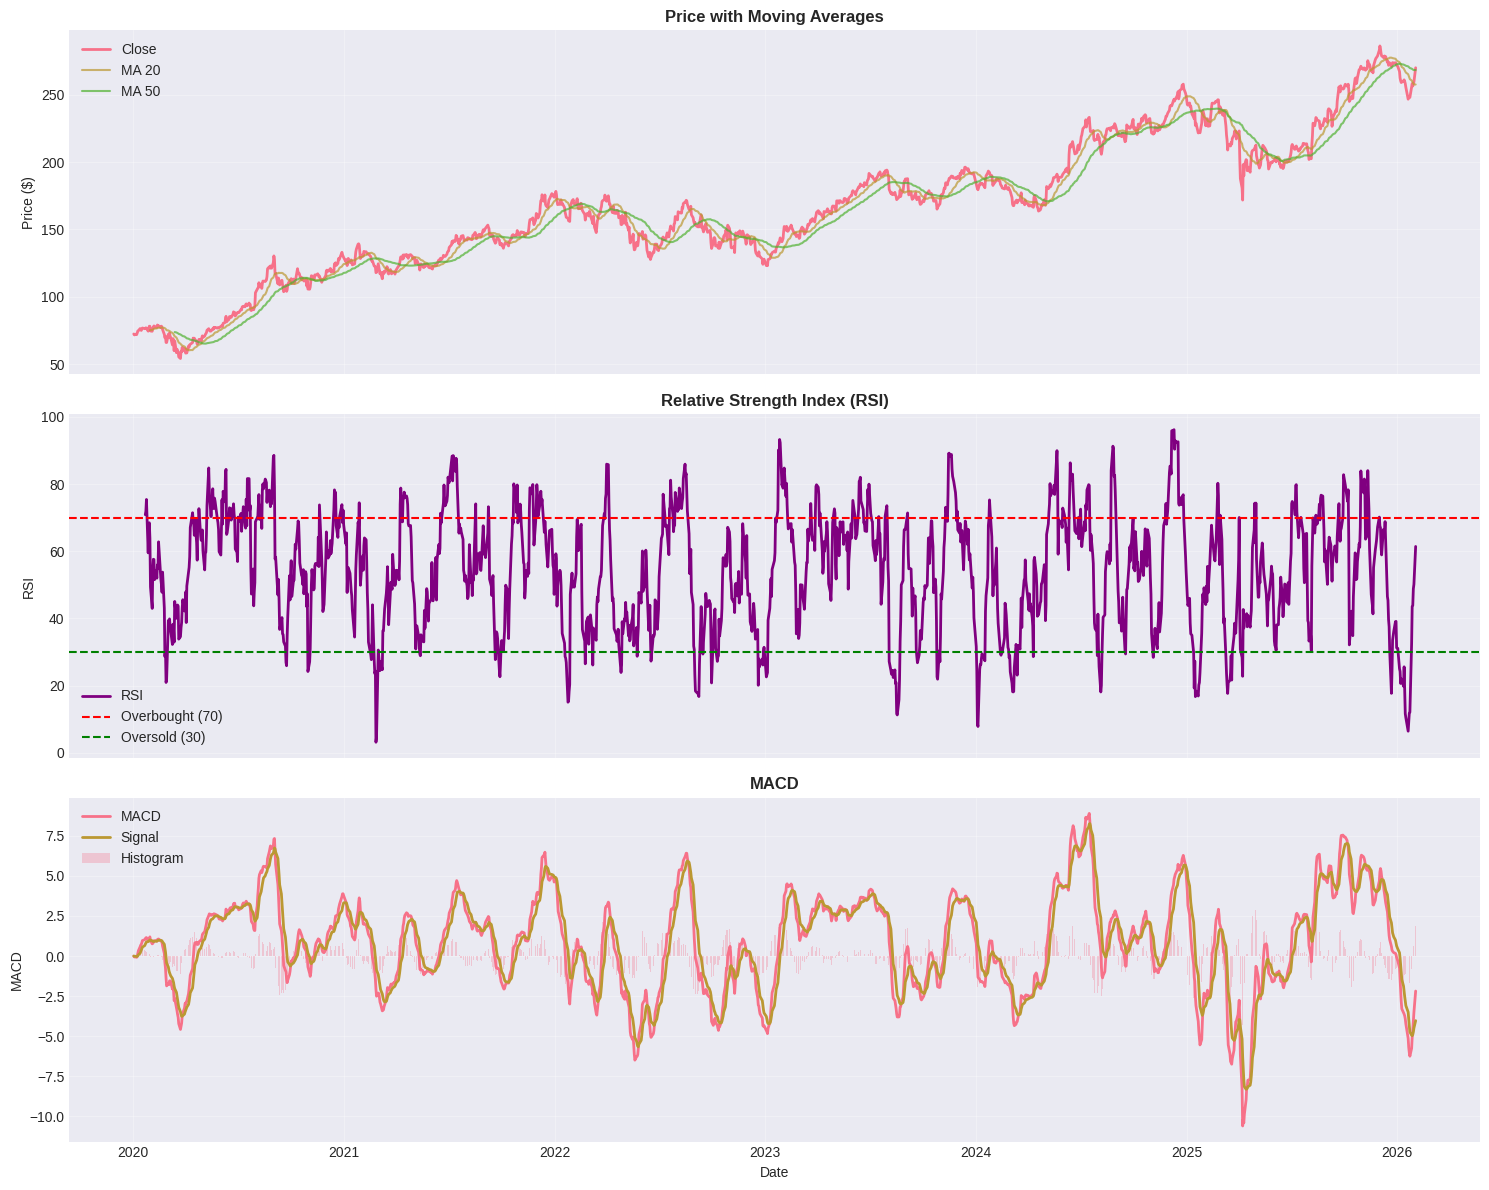

In [ ]:
# Visualize some technical indicators
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Plot 1: Price with Moving Averages
axes[0].plot(df_features.index, df_features['Close'], label='Close', linewidth=2)
axes[0].plot(df_features.index, df_features['MA_20'], label='MA 20', alpha=0.7)
axes[0].plot(df_features.index, df_features['MA_50'], label='MA 50', alpha=0.7)
axes[0].set_title('Price with Moving Averages', fontweight='bold')
axes[0].set_ylabel('Price ($)')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: RSI
axes[1].plot(df_features.index, df_features['RSI'], label='RSI', color='purple', linewidth=2)
axes[1].axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
axes[1].axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
axes[1].set_title('Relative Strength Index (RSI)', fontweight='bold')
axes[1].set_ylabel('RSI')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# Plot 3: MACD
axes[2].plot(df_features.index, df_features['MACD'], label='MACD', linewidth=2)
axes[2].plot(df_features.index, df_features['MACD_Signal'], label='Signal', linewidth=2)
axes[2].bar(df_features.index, df_features['MACD'] - df_features['MACD_Signal'],
            label='Histogram', alpha=0.3)
axes[2].set_title('MACD', fontweight='bold')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('MACD')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Data Cleaning and Preparation

In [ ]:
# Remove rows with NaN values (due to rolling windows and shifts)
df_clean = df_features.dropna()

print(f'Original shape: {df_features.shape}')
print(f'Clean shape: {df_clean.shape}')
print(f'Rows removed: {len(df_features) - len(df_clean)}')

# Check for any remaining missing values
print(f'\nRemaining missing values: {df_clean.isnull().sum().sum()}')

Original shape: (1529, 34)
Clean shape: (1479, 34)
Rows removed: 50

Remaining missing values: 0


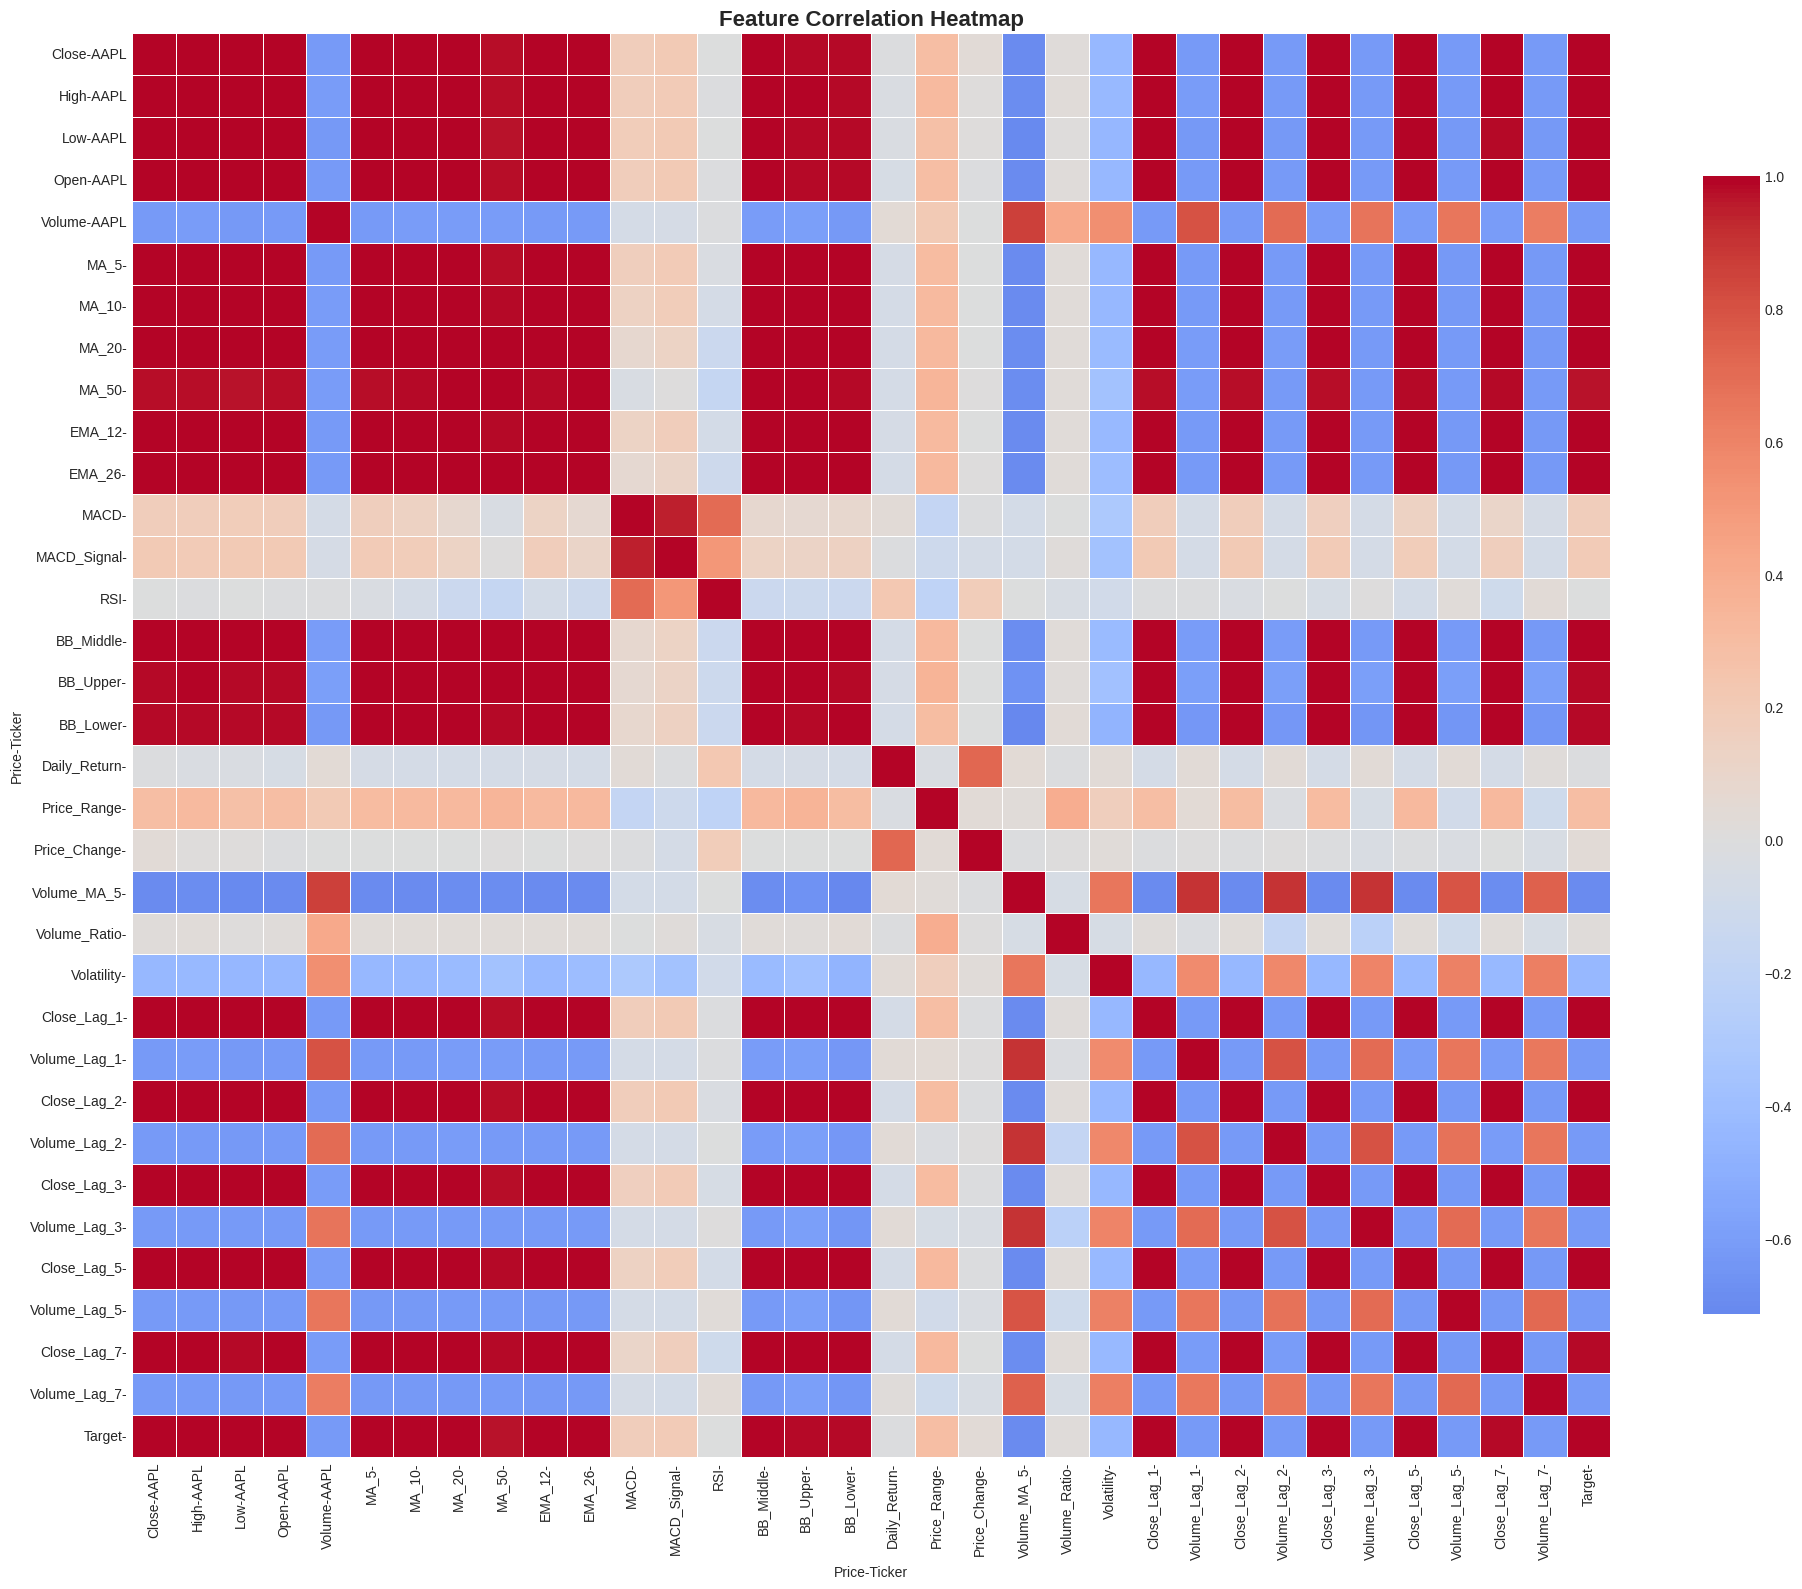


Top 10 features correlated with Target:
Price        Ticker
Close        AAPL      0.998053
Low          AAPL      0.997494
High         AAPL      0.997487
Open         AAPL      0.996733
Close_Lag_1            0.995998
MA_5                   0.995564
Close_Lag_2            0.993851
EMA_12                 0.993573
MA_10                  0.992735
Close_Lag_3            0.991891
Name: Target, dtype: float64


In [ ]:
# Correlation Analysis
# Select numeric columns only
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show top correlations with target
target_corr = correlation_matrix['Target'].sort_values(ascending=False)
print('\nTop 10 features correlated with Target:')
print(target_corr.head(11)[1:])  # Exclude Target itself

In [ ]:
# Save processed data
df_clean.to_csv('../data/processed_market_data.csv')
print('Processed data saved to ../data/processed_market_data.csv')

# Display summary
print('\n' + '='*50)
print('DATA PREPARATION SUMMARY')
print('='*50)
print(f'Total samples: {len(df_clean)}')
print(f'Total features: {len(df_clean.columns)}')
print(f'Date range: {df_clean.index.min()} to {df_clean.index.max()}')
print('\nReady for model building! ✓')

Processed data saved to ../data/processed_market_data.csv

DATA PREPARATION SUMMARY
Total samples: 1479
Total features: 34
Date range: 2020-03-13 00:00:00 to 2026-01-30 00:00:00

Ready for model building! ✓
